In [4]:
import sys, os, math
import statistics
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

sys.path.append('../ml_pipeline')
import label_converter

# import functions instead of having them in here to keep the notebook *much* shorter
sys.path.append('functions')
from load_data import load_data


fontsize=12

In [28]:
data_folder = '/storage/groups/qscd01/projects/aml_mil_hehr/final_results/bootstrap'
data_folder = '/storage/groups/qscd01/projects/aml_mil_hehr/final_results/how_constant_is_the_fold'
dataset_folder = '/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized'
feature_prefix = 'fnl34_'

In [29]:
folders_available = os.listdir(data_folder)

sc_df_buffer = []
out_folders = []
for f in folders_available:
#     if not '_1' in f:
#         continue

    if not 'stability' in f:
        continue

    try:
        data = load_data([f], 
                            data_folder,
                            feature_prefix,
                            dataset_folder,
                            load_sc_features=False)
    except Exception:
        continue
    
    lbl_conv_obj, confusion_matrix_obj, patient_df, sc_df = data
    sc_df_buffer.append(sc_df)
    out_folders.append(f)


100%|██████████| 41/41 [00:00<00:00, 60.62it/s]


In [30]:
show_pat_idx = 'PKC'

'''
BHS:f0
pkc:f1
'''
attention_to_consider = 'att_softmax_AML-PML-RARA'

attention_df = None
for idx in range(len(sc_df_buffer)):
    df_cur = sc_df_buffer[idx]
    
    if not show_pat_idx in df_cur.index:
        continue
        
    pat_df = df_cur.loc[show_pat_idx]
    pat_df = pat_df.set_index('im_path')
    
    data_df = pat_df[attention_to_consider].to_frame()
    data_df = data_df.rename(columns={attention_to_consider:out_folders[idx]})
    
    if(attention_df is None):
        attention_df = data_df
    else:
        attention_df = attention_df.join(data_df)
        
cols = attention_df.columns
mean = attention_df.mean(axis=1)
stdev = attention_df.std(axis=1)

attention_df['mean'] = mean
attention_df['stdev'] = stdev
attention_df = attention_df.sort_values(by='mean', ascending=False)

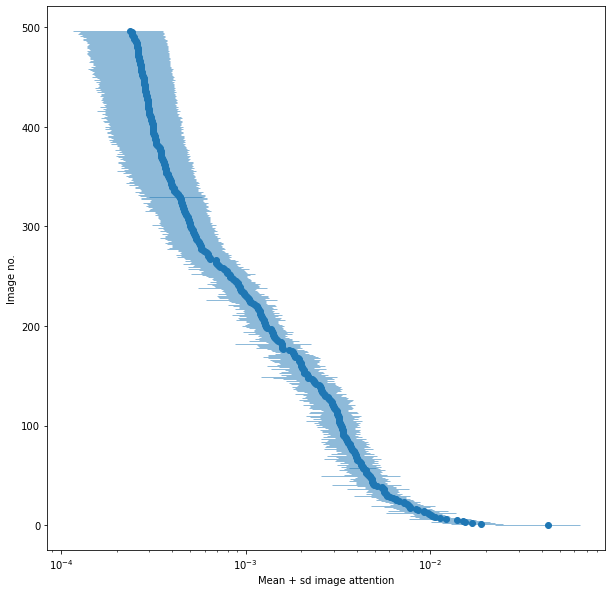

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xscale('log')
ax.scatter(x=attention_df['mean'], y=range(len(attention_df)))
ax.hlines(y=range(len(attention_df)), xmin=attention_df['mean']-attention_df['stdev'], xmax = attention_df['mean'] + attention_df['stdev'],
         linewidth=0.5)
ax.set_xlabel('Mean + sd image attention')
ax.set_ylabel('Image no.')
plt.show()

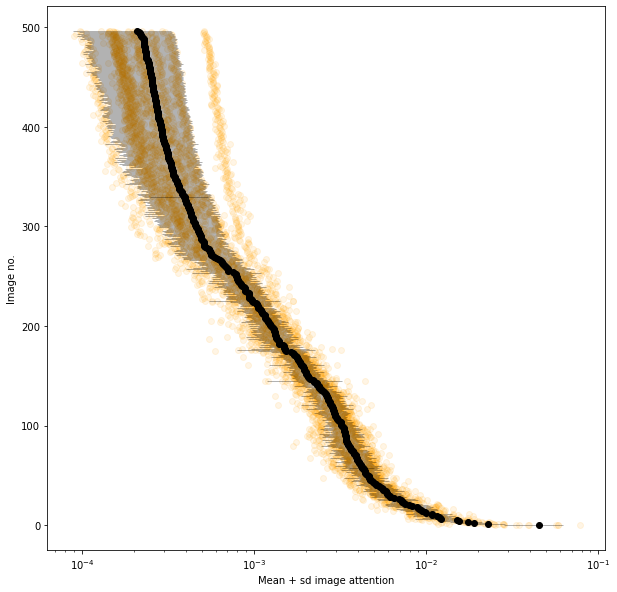

10


In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xscale('log')
for c in attention_df.columns:
    if not c in ['mean', 'stdev']:
        ax.scatter(x=attention_df[c], y=range(len(attention_df)), c='orange', alpha=0.1)
        
ax.scatter(x=attention_df['mean'], y=range(len(attention_df)), color='k')
ax.hlines(y=range(len(attention_df)), xmin=attention_df['mean']-attention_df['stdev'], xmax = attention_df['mean'] + attention_df['stdev'],
         linewidth=1, color='k', alpha=0.3)

ax.set_xlabel('Mean + sd image attention')
ax.set_ylabel('Image no.')
    
plt.show()

print(len(attention_df.columns)-2)

In [18]:
attention_df

,bootstrap_14_1,bootstrap_9_1,bootstrap_3_1,bootstrap_2_1,bootstrap_8_1,bootstrap_15_1,bootstrap_17_1,bootstrap_0_1,bootstrap_1_1,bootstrap_16_1,...,bootstrap_22_1,bootstrap_13_1,bootstrap_11_1,bootstrap_20_1,bootstrap_6_1,bootstrap_7_1,bootstrap_21_1,bootstrap_10_1,mean,stdev
im_path,,,,,,,,,,,,,,,,,,,,,
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/266.TIF,0.009616,0.087776,0.064481,0.043761,0.037049,0.027713,0.018280,0.030749,0.042376,0.063571,...,0.056326,0.011734,0.035578,0.026996,0.091860,0.020468,0.061260,0.042793,0.043456,0.020988
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/493.TIF,0.004266,0.021526,0.017833,0.013058,0.019521,0.019681,0.015764,0.017822,0.020796,0.029650,...,0.015958,0.012815,0.012521,0.014348,0.020224,0.011788,0.023474,0.021433,0.018777,0.005894
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/334.TIF,0.003361,0.021325,0.017677,0.014209,0.014628,0.017701,0.015213,0.015448,0.019215,0.024363,...,0.015595,0.010156,0.013390,0.011605,0.019438,0.006777,0.021808,0.014254,0.016864,0.005355
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/272.TIF,0.002532,0.016696,0.012566,0.013260,0.016781,0.017554,0.013880,0.015090,0.018214,0.023193,...,0.018396,0.010587,0.008211,0.011388,0.016467,0.006960,0.018046,0.009812,0.015469,0.005423
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/299.TIF,0.005621,0.021184,0.015944,0.014011,0.010533,0.015068,0.013416,0.015569,0.019119,0.016529,...,0.013518,0.009039,0.017384,0.012399,0.015637,0.007888,0.021019,0.016127,0.014961,0.003965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/014.TIF,0.000400,0.000162,0.000200,0.000189,0.000123,0.000140,0.000373,0.000250,0.000292,0.000262,...,0.000219,0.000596,0.000147,0.000194,0.000251,0.000139,0.000191,0.000139,0.000243,0.000112
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/313.TIF,0.000331,0.000166,0.000197,0.000208,0.000116,0.000157,0.000409,0.000236,0.000262,0.000263,...,0.000193,0.000630,0.000135,0.000189,0.000267,0.000125,0.000183,0.000127,0.000243,0.000119
/storage/groups/qscd01/datasets/210526_mll_mil_pseudonymized/data/AML-PML-RARA/PKC/462.TIF,0.000374,0.000168,0.000180,0.000197,0.000121,0.000162,0.000377,0.000261,0.000256,0.000256,...,0.000188,0.000641,0.000144,0.000183,0.000246,0.000139,0.000201,0.000139,0.000243,0.000117
